The problem statement is "<i>Train a machine learning model that select the best batsman available that increases the chances of winning a cricket match<i>".

The high level steps that have been followed are : 
1. Collect and preprocess the dataset
2. Select a suitable machine learning algorithm
3. Train the model
4. Evaluate the model's performance
    

In [2]:
import os
import yaml # since dataset is in yaml format
import pandas as pd # data manipulation in dataframe is more intuitive
from glob import glob

In [6]:
def extract_features(match_data):
    players = set()
    player_stats = {}

    for delivery in match_data['innings'][0]['1st innings']['deliveries']:
        for ball in delivery.values():
            players.add(ball['batsman'])
            players.add(ball['bowler'])

    for player in players:
        player_stats[player] = {
            'runs': 0,
            'balls_faced': 0,
            'wickets': 0,
            'balls_bowled': 0,
            'runs_conceded': 0
        }

    for delivery in match_data['innings'][0]['1st innings']['deliveries']:
        for ball in delivery.values():
            batsman = ball['batsman']
            bowler = ball['bowler']
            runs = ball['runs']['batsman']

            player_stats[batsman]['runs'] += runs
            player_stats[batsman]['balls_faced'] += 1
            player_stats[bowler]['balls_bowled'] += 1
            player_stats[bowler]['runs_conceded'] += runs

            if 'wicket' in ball:
                player_stats[bowler]['wickets'] += 1

    return player_stats

In [7]:
def create_dataframe(player_stats):
    data = []
    for player, stats in player_stats.items():
        try: 
            if stats['balls_faced'] > 0:
                batting_average = stats['runs'] / stats['balls_faced']
                strike_rate = (stats['runs'] / stats['balls_faced']) * 100
            else:
                batting_average = 0
                strike_rate = 0

            if stats['balls_bowled'] > 0:
                bowling_average = stats['runs_conceded'] / stats['wickets']
            else:
                bowling_average = 0

            data.append({
                'player': player,
                'batting_average': batting_average,
                'strike_rate': strike_rate,
                'bowling_average': bowling_average
            })
        except:
            continue

    return pd.DataFrame(data)

In [8]:
# driver code for data cleaning, pre prossessing, analysis and feature engineering.
data_dir = 'data'
yaml_files = glob(os.path.join(data_dir, '*.yaml'))

all_player_stats = {}
file_count = 0
for yaml_file in yaml_files:
    try:
        with open(yaml_file, 'r') as f:
            match_data = yaml.safe_load(f)

        player_stats = extract_features(match_data)

        for player, stats in player_stats.items():
            if player not in all_player_stats:
                all_player_stats[player] = stats
            else:
                for key, value in stats.items():
                    all_player_stats[player][key] += value
        print(f"processed no files {file_count}")
        file_count+=1
    except:
        continue

df = create_dataframe(all_player_stats)
df.to_csv('preprocessed_data.csv', index=False)

processed no files 0
processed no files 1
processed no files 2
processed no files 3
processed no files 4
processed no files 5
processed no files 6
processed no files 7
processed no files 8
processed no files 9
processed no files 10
processed no files 11
processed no files 12
processed no files 13
processed no files 14
processed no files 15
processed no files 16
processed no files 17
processed no files 18
processed no files 19
processed no files 20
processed no files 21
processed no files 22
processed no files 23
processed no files 24
processed no files 25
processed no files 26
processed no files 27
processed no files 28
processed no files 29
processed no files 30
processed no files 31
processed no files 32
processed no files 33
processed no files 34
processed no files 35
processed no files 36
processed no files 37
processed no files 38
processed no files 39
processed no files 40
processed no files 41
processed no files 42
processed no files 43
processed no files 44
processed no files 4

processed no files 361
processed no files 362
processed no files 363
processed no files 364
processed no files 365
processed no files 366
processed no files 367
processed no files 368
processed no files 369
processed no files 370
processed no files 371
processed no files 372
processed no files 373
processed no files 374
processed no files 375
processed no files 376
processed no files 377
processed no files 378
processed no files 379
processed no files 380
processed no files 381
processed no files 382
processed no files 383
processed no files 384
processed no files 385
processed no files 386
processed no files 387
processed no files 388
processed no files 389
processed no files 390
processed no files 391
processed no files 392
processed no files 393
processed no files 394
processed no files 395
processed no files 396
processed no files 397
processed no files 398
processed no files 399
processed no files 400
processed no files 401
processed no files 402
processed no files 403
processed n

processed no files 718
processed no files 719
processed no files 720
processed no files 721
processed no files 722
processed no files 723
processed no files 724
processed no files 725
processed no files 726
processed no files 727
processed no files 728
processed no files 729
processed no files 730
processed no files 731
processed no files 732
processed no files 733
processed no files 734
processed no files 735
processed no files 736
processed no files 737
processed no files 738
processed no files 739
processed no files 740
processed no files 741
processed no files 742
processed no files 743
processed no files 744
processed no files 745
processed no files 746
processed no files 747
processed no files 748
processed no files 749
processed no files 750
processed no files 751
processed no files 752
processed no files 753
processed no files 754
processed no files 755
processed no files 756
processed no files 757
processed no files 758
processed no files 759
processed no files 760
processed n

processed no files 1072
processed no files 1073
processed no files 1074
processed no files 1075
processed no files 1076
processed no files 1077
processed no files 1078
processed no files 1079
processed no files 1080
processed no files 1081
processed no files 1082
processed no files 1083
processed no files 1084
processed no files 1085
processed no files 1086
processed no files 1087
processed no files 1088
processed no files 1089
processed no files 1090
processed no files 1091
processed no files 1092
processed no files 1093
processed no files 1094
processed no files 1095
processed no files 1096
processed no files 1097
processed no files 1098
processed no files 1099
processed no files 1100
processed no files 1101
processed no files 1102
processed no files 1103
processed no files 1104
processed no files 1105
processed no files 1106
processed no files 1107
processed no files 1108
processed no files 1109
processed no files 1110
processed no files 1111
processed no files 1112
processed no fil

processed no files 1414
processed no files 1415
processed no files 1416
processed no files 1417
processed no files 1418
processed no files 1419
processed no files 1420
processed no files 1421
processed no files 1422
processed no files 1423
processed no files 1424
processed no files 1425
processed no files 1426
processed no files 1427
processed no files 1428
processed no files 1429
processed no files 1430
processed no files 1431
processed no files 1432
processed no files 1433
processed no files 1434
processed no files 1435
processed no files 1436
processed no files 1437
processed no files 1438
processed no files 1439
processed no files 1440
processed no files 1441
processed no files 1442
processed no files 1443
processed no files 1444
processed no files 1445
processed no files 1446
processed no files 1447
processed no files 1448
processed no files 1449
processed no files 1450
processed no files 1451
processed no files 1452
processed no files 1453
processed no files 1454
processed no fil

processed no files 1756
processed no files 1757
processed no files 1758
processed no files 1759
processed no files 1760
processed no files 1761
processed no files 1762
processed no files 1763
processed no files 1764
processed no files 1765
processed no files 1766
processed no files 1767
processed no files 1768
processed no files 1769
processed no files 1770
processed no files 1771
processed no files 1772
processed no files 1773
processed no files 1774
processed no files 1775
processed no files 1776
processed no files 1777
processed no files 1778
processed no files 1779
processed no files 1780
processed no files 1781
processed no files 1782
processed no files 1783
processed no files 1784
processed no files 1785
processed no files 1786
processed no files 1787
processed no files 1788
processed no files 1789
processed no files 1790
processed no files 1791
processed no files 1792
processed no files 1793
processed no files 1794
processed no files 1795
processed no files 1796
processed no fil

processed no files 2098
processed no files 2099
processed no files 2100
processed no files 2101
processed no files 2102
processed no files 2103
processed no files 2104
processed no files 2105
processed no files 2106
processed no files 2107
processed no files 2108
processed no files 2109
processed no files 2110
processed no files 2111
processed no files 2112
processed no files 2113
processed no files 2114
processed no files 2115
processed no files 2116
processed no files 2117
processed no files 2118
processed no files 2119
processed no files 2120
processed no files 2121
processed no files 2122
processed no files 2123
processed no files 2124
processed no files 2125
processed no files 2126
processed no files 2127
processed no files 2128
processed no files 2129
processed no files 2130
processed no files 2131
processed no files 2132
processed no files 2133
processed no files 2134
processed no files 2135
processed no files 2136
processed no files 2137
processed no files 2138
processed no fil

processed no files 2440
processed no files 2441
processed no files 2442
processed no files 2443
processed no files 2444
processed no files 2445
processed no files 2446
processed no files 2447
processed no files 2448
processed no files 2449
processed no files 2450
processed no files 2451
processed no files 2452
processed no files 2453
processed no files 2454
processed no files 2455
processed no files 2456
processed no files 2457
processed no files 2458
processed no files 2459
processed no files 2460
processed no files 2461
processed no files 2462
processed no files 2463
processed no files 2464
processed no files 2465
processed no files 2466
processed no files 2467
processed no files 2468
processed no files 2469
processed no files 2470
processed no files 2471
processed no files 2472
processed no files 2473
processed no files 2474
processed no files 2475
processed no files 2476
processed no files 2477
processed no files 2478
processed no files 2479
processed no files 2480
processed no fil

processed no files 2782
processed no files 2783
processed no files 2784
processed no files 2785
processed no files 2786
processed no files 2787
processed no files 2788
processed no files 2789
processed no files 2790
processed no files 2791
processed no files 2792
processed no files 2793
processed no files 2794
processed no files 2795
processed no files 2796
processed no files 2797
processed no files 2798
processed no files 2799
processed no files 2800
processed no files 2801
processed no files 2802
processed no files 2803
processed no files 2804
processed no files 2805
processed no files 2806
processed no files 2807
processed no files 2808
processed no files 2809
processed no files 2810
processed no files 2811
processed no files 2812
processed no files 2813
processed no files 2814
processed no files 2815
processed no files 2816
processed no files 2817
processed no files 2818
processed no files 2819
processed no files 2820
processed no files 2821
processed no files 2822
processed no fil

processed no files 3124
processed no files 3125
processed no files 3126
processed no files 3127
processed no files 3128
processed no files 3129
processed no files 3130
processed no files 3131
processed no files 3132
processed no files 3133
processed no files 3134
processed no files 3135
processed no files 3136
processed no files 3137
processed no files 3138
processed no files 3139
processed no files 3140
processed no files 3141
processed no files 3142
processed no files 3143
processed no files 3144
processed no files 3145
processed no files 3146
processed no files 3147
processed no files 3148
processed no files 3149
processed no files 3150
processed no files 3151
processed no files 3152
processed no files 3153
processed no files 3154
processed no files 3155
processed no files 3156
processed no files 3157
processed no files 3158
processed no files 3159
processed no files 3160
processed no files 3161
processed no files 3162
processed no files 3163
processed no files 3164
processed no fil

processed no files 3466
processed no files 3467
processed no files 3468
processed no files 3469
processed no files 3470
processed no files 3471
processed no files 3472
processed no files 3473
processed no files 3474
processed no files 3475
processed no files 3476
processed no files 3477
processed no files 3478
processed no files 3479
processed no files 3480
processed no files 3481
processed no files 3482
processed no files 3483
processed no files 3484
processed no files 3485
processed no files 3486
processed no files 3487
processed no files 3488
processed no files 3489
processed no files 3490
processed no files 3491
processed no files 3492
processed no files 3493
processed no files 3494
processed no files 3495
processed no files 3496
processed no files 3497
processed no files 3498
processed no files 3499
processed no files 3500
processed no files 3501
processed no files 3502
processed no files 3503
processed no files 3504
processed no files 3505
processed no files 3506
processed no fil

processed no files 3808
processed no files 3809
processed no files 3810
processed no files 3811
processed no files 3812
processed no files 3813
processed no files 3814
processed no files 3815
processed no files 3816
processed no files 3817
processed no files 3818
processed no files 3819
processed no files 3820
processed no files 3821
processed no files 3822
processed no files 3823
processed no files 3824
processed no files 3825
processed no files 3826
processed no files 3827
processed no files 3828
processed no files 3829
processed no files 3830
processed no files 3831
processed no files 3832
processed no files 3833
processed no files 3834
processed no files 3835
processed no files 3836
processed no files 3837
processed no files 3838
processed no files 3839
processed no files 3840
processed no files 3841
processed no files 3842
processed no files 3843
processed no files 3844
processed no files 3845
processed no files 3846
processed no files 3847
processed no files 3848
processed no fil

processed no files 4150
processed no files 4151
processed no files 4152
processed no files 4153
processed no files 4154
processed no files 4155
processed no files 4156
processed no files 4157
processed no files 4158
processed no files 4159
processed no files 4160
processed no files 4161
processed no files 4162
processed no files 4163
processed no files 4164
processed no files 4165
processed no files 4166
processed no files 4167
processed no files 4168
processed no files 4169
processed no files 4170
processed no files 4171
processed no files 4172
processed no files 4173
processed no files 4174
processed no files 4175
processed no files 4176
processed no files 4177
processed no files 4178
processed no files 4179
processed no files 4180
processed no files 4181
processed no files 4182
processed no files 4183
processed no files 4184
processed no files 4185
processed no files 4186
processed no files 4187
processed no files 4188
processed no files 4189
processed no files 4190
processed no fil

processed no files 4833
processed no files 4834
processed no files 4835
processed no files 4836
processed no files 4837
processed no files 4838
processed no files 4839
processed no files 4840
processed no files 4841
processed no files 4842
processed no files 4843
processed no files 4844
processed no files 4845
processed no files 4846
processed no files 4847
processed no files 4848
processed no files 4849
processed no files 4850
processed no files 4851
processed no files 4852
processed no files 4853
processed no files 4854
processed no files 4855
processed no files 4856
processed no files 4857
processed no files 4858
processed no files 4859
processed no files 4860
processed no files 4861
processed no files 4862
processed no files 4863
processed no files 4864
processed no files 4865
processed no files 4866
processed no files 4867
processed no files 4868
processed no files 4869
processed no files 4870
processed no files 4871
processed no files 4872
processed no files 4873
processed no fil

processed no files 5175
processed no files 5176
processed no files 5177
processed no files 5178
processed no files 5179
processed no files 5180
processed no files 5181
processed no files 5182
processed no files 5183
processed no files 5184
processed no files 5185
processed no files 5186
processed no files 5187
processed no files 5188
processed no files 5189
processed no files 5190
processed no files 5191
processed no files 5192
processed no files 5193
processed no files 5194
processed no files 5195
processed no files 5196
processed no files 5197
processed no files 5198
processed no files 5199
processed no files 5200
processed no files 5201
processed no files 5202
processed no files 5203
processed no files 5204
processed no files 5205
processed no files 5206
processed no files 5207
processed no files 5208
processed no files 5209
processed no files 5210
processed no files 5211
processed no files 5212
processed no files 5213
processed no files 5214
processed no files 5215
processed no fil

processed no files 5517
processed no files 5518
processed no files 5519
processed no files 5520
processed no files 5521
processed no files 5522
processed no files 5523
processed no files 5524
processed no files 5525
processed no files 5526
processed no files 5527
processed no files 5528
processed no files 5529
processed no files 5530
processed no files 5531
processed no files 5532
processed no files 5533
processed no files 5534
processed no files 5535
processed no files 5536
processed no files 5537
processed no files 5538
processed no files 5539
processed no files 5540
processed no files 5541
processed no files 5542
processed no files 5543
processed no files 5544
processed no files 5545
processed no files 5546
processed no files 5547
processed no files 5548
processed no files 5549
processed no files 5550
processed no files 5551
processed no files 5552
processed no files 5553
processed no files 5554
processed no files 5555
processed no files 5556
processed no files 5557
processed no fil

processed no files 5859
processed no files 5860
processed no files 5861
processed no files 5862
processed no files 5863
processed no files 5864
processed no files 5865
processed no files 5866
processed no files 5867
processed no files 5868
processed no files 5869
processed no files 5870
processed no files 5871
processed no files 5872
processed no files 5873
processed no files 5874
processed no files 5875
processed no files 5876
processed no files 5877
processed no files 5878
processed no files 5879
processed no files 5880
processed no files 5881
processed no files 5882
processed no files 5883
processed no files 5884
processed no files 5885
processed no files 5886
processed no files 5887
processed no files 5888
processed no files 5889
processed no files 5890
processed no files 5891
processed no files 5892
processed no files 5893
processed no files 5894
processed no files 5895
processed no files 5896
processed no files 5897
processed no files 5898
processed no files 5899
processed no fil

processed no files 6201
processed no files 6202
processed no files 6203
processed no files 6204
processed no files 6205
processed no files 6206
processed no files 6207
processed no files 6208
processed no files 6209
processed no files 6210
processed no files 6211
processed no files 6212
processed no files 6213
processed no files 6214
processed no files 6215
processed no files 6216
processed no files 6217
processed no files 6218
processed no files 6219
processed no files 6220
processed no files 6221
processed no files 6222
processed no files 6223
processed no files 6224
processed no files 6225
processed no files 6226
processed no files 6227
processed no files 6228
processed no files 6229
processed no files 6230
processed no files 6231
processed no files 6232
processed no files 6233
processed no files 6234
processed no files 6235
processed no files 6236
processed no files 6237
processed no files 6238
processed no files 6239
processed no files 6240
processed no files 6241
processed no fil

processed no files 6543
processed no files 6544
processed no files 6545
processed no files 6546
processed no files 6547
processed no files 6548
processed no files 6549
processed no files 6550
processed no files 6551
processed no files 6552
processed no files 6553
processed no files 6554
processed no files 6555
processed no files 6556
processed no files 6557
processed no files 6558
processed no files 6559
processed no files 6560
processed no files 6561
processed no files 6562
processed no files 6563
processed no files 6564
processed no files 6565
processed no files 6566
processed no files 6567
processed no files 6568
processed no files 6569
processed no files 6570
processed no files 6571
processed no files 6572
processed no files 6573
processed no files 6574
processed no files 6575
processed no files 6576
processed no files 6577
processed no files 6578
processed no files 6579
processed no files 6580
processed no files 6581
processed no files 6582
processed no files 6583
processed no fil

processed no files 6885
processed no files 6886
processed no files 6887
processed no files 6888
processed no files 6889
processed no files 6890
processed no files 6891
processed no files 6892
processed no files 6893
processed no files 6894
processed no files 6895
processed no files 6896
processed no files 6897
processed no files 6898
processed no files 6899
processed no files 6900
processed no files 6901
processed no files 6902
processed no files 6903
processed no files 6904
processed no files 6905
processed no files 6906
processed no files 6907
processed no files 6908
processed no files 6909
processed no files 6910
processed no files 6911
processed no files 6912
processed no files 6913
processed no files 6914
processed no files 6915
processed no files 6916
processed no files 6917
processed no files 6918
processed no files 6919
processed no files 6920
processed no files 6921
processed no files 6922
processed no files 6923
processed no files 6924
processed no files 6925
processed no fil

processed no files 7227
processed no files 7228
processed no files 7229
processed no files 7230
processed no files 7231
processed no files 7232
processed no files 7233
processed no files 7234
processed no files 7235
processed no files 7236
processed no files 7237
processed no files 7238
processed no files 7239
processed no files 7240
processed no files 7241
processed no files 7242
processed no files 7243
processed no files 7244
processed no files 7245
processed no files 7246
processed no files 7247
processed no files 7248
processed no files 7249
processed no files 7250
processed no files 7251
processed no files 7252
processed no files 7253
processed no files 7254
processed no files 7255
processed no files 7256
processed no files 7257
processed no files 7258
processed no files 7259
processed no files 7260
processed no files 7261
processed no files 7262
processed no files 7263
processed no files 7264
processed no files 7265
processed no files 7266
processed no files 7267
processed no fil

processed no files 7569
processed no files 7570
processed no files 7571
processed no files 7572
processed no files 7573
processed no files 7574
processed no files 7575
processed no files 7576
processed no files 7577
processed no files 7578
processed no files 7579
processed no files 7580
processed no files 7581
processed no files 7582
processed no files 7583
processed no files 7584
processed no files 7585
processed no files 7586
processed no files 7587
processed no files 7588
processed no files 7589
processed no files 7590
processed no files 7591
processed no files 7592
processed no files 7593
processed no files 7594
processed no files 7595
processed no files 7596
processed no files 7597
processed no files 7598
processed no files 7599
processed no files 7600
processed no files 7601
processed no files 7602
processed no files 7603
processed no files 7604
processed no files 7605
processed no files 7606
processed no files 7607
processed no files 7608
processed no files 7609
processed no fil

processed no files 8252
processed no files 8253
processed no files 8254
processed no files 8255
processed no files 8256
processed no files 8257
processed no files 8258
processed no files 8259
processed no files 8260
processed no files 8261
processed no files 8262
processed no files 8263
processed no files 8264
processed no files 8265
processed no files 8266
processed no files 8267
processed no files 8268
processed no files 8269
processed no files 8270
processed no files 8271
processed no files 8272
processed no files 8273
processed no files 8274
processed no files 8275
processed no files 8276
processed no files 8277
processed no files 8278
processed no files 8279
processed no files 8280
processed no files 8281
processed no files 8282
processed no files 8283
processed no files 8284
processed no files 8285
processed no files 8286
processed no files 8287
processed no files 8288
processed no files 8289
processed no files 8290
processed no files 8291
processed no files 8292
processed no fil

processed no files 8594
processed no files 8595
processed no files 8596
processed no files 8597
processed no files 8598
processed no files 8599
processed no files 8600
processed no files 8601
processed no files 8602
processed no files 8603
processed no files 8604
processed no files 8605
processed no files 8606
processed no files 8607
processed no files 8608
processed no files 8609
processed no files 8610
processed no files 8611
processed no files 8612
processed no files 8613
processed no files 8614
processed no files 8615
processed no files 8616
processed no files 8617
processed no files 8618
processed no files 8619
processed no files 8620
processed no files 8621
processed no files 8622
processed no files 8623
processed no files 8624
processed no files 8625
processed no files 8626
processed no files 8627
processed no files 8628
processed no files 8629
processed no files 8630
processed no files 8631
processed no files 8632
processed no files 8633
processed no files 8634
processed no fil

processed no files 8936
processed no files 8937
processed no files 8938
processed no files 8939
processed no files 8940
processed no files 8941
processed no files 8942
processed no files 8943
processed no files 8944
processed no files 8945
processed no files 8946
processed no files 8947
processed no files 8948
processed no files 8949
processed no files 8950
processed no files 8951
processed no files 8952
processed no files 8953
processed no files 8954
processed no files 8955
processed no files 8956
processed no files 8957
processed no files 8958
processed no files 8959
processed no files 8960
processed no files 8961
processed no files 8962
processed no files 8963
processed no files 8964
processed no files 8965
processed no files 8966
processed no files 8967
processed no files 8968
processed no files 8969
processed no files 8970
processed no files 8971
processed no files 8972
processed no files 8973
processed no files 8974
processed no files 8975
processed no files 8976
processed no fil

processed no files 9278
processed no files 9279
processed no files 9280
processed no files 9281
processed no files 9282
processed no files 9283
processed no files 9284
processed no files 9285
processed no files 9286
processed no files 9287
processed no files 9288
processed no files 9289
processed no files 9290
processed no files 9291
processed no files 9292
processed no files 9293
processed no files 9294
processed no files 9295
processed no files 9296
processed no files 9297
processed no files 9298
processed no files 9299
processed no files 9300
processed no files 9301
processed no files 9302
processed no files 9303
processed no files 9304
processed no files 9305
processed no files 9306
processed no files 9307
processed no files 9308
processed no files 9309
processed no files 9310
processed no files 9311
processed no files 9312
processed no files 9313
processed no files 9314
processed no files 9315
processed no files 9316
processed no files 9317
processed no files 9318
processed no fil

processed no files 9620
processed no files 9621
processed no files 9622
processed no files 9623
processed no files 9624
processed no files 9625
processed no files 9626
processed no files 9627
processed no files 9628
processed no files 9629
processed no files 9630
processed no files 9631
processed no files 9632
processed no files 9633
processed no files 9634
processed no files 9635
processed no files 9636
processed no files 9637
processed no files 9638
processed no files 9639
processed no files 9640
processed no files 9641
processed no files 9642
processed no files 9643
processed no files 9644
processed no files 9645
processed no files 9646
processed no files 9647
processed no files 9648
processed no files 9649
processed no files 9650
processed no files 9651
processed no files 9652
processed no files 9653
processed no files 9654
processed no files 9655
processed no files 9656
processed no files 9657
processed no files 9658
processed no files 9659
processed no files 9660
processed no fil

processed no files 10291
processed no files 10292
processed no files 10293
processed no files 10294
processed no files 10295
processed no files 10296
processed no files 10297
processed no files 10298
processed no files 10299
processed no files 10300
processed no files 10301
processed no files 10302
processed no files 10303
processed no files 10304
processed no files 10305
processed no files 10306
processed no files 10307
processed no files 10308
processed no files 10309
processed no files 10310
processed no files 10311
processed no files 10312
processed no files 10313
processed no files 10314
processed no files 10315
processed no files 10316
processed no files 10317
processed no files 10318
processed no files 10319
processed no files 10320
processed no files 10321
processed no files 10322
processed no files 10323
processed no files 10324
processed no files 10325
processed no files 10326
processed no files 10327
processed no files 10328
processed no files 10329
processed no files 10330


processed no files 10619
processed no files 10620
processed no files 10621
processed no files 10622
processed no files 10623
processed no files 10624
processed no files 10625
processed no files 10626
processed no files 10627
processed no files 10628
processed no files 10629
processed no files 10630
processed no files 10631
processed no files 10632
processed no files 10633
processed no files 10634
processed no files 10635
processed no files 10636
processed no files 10637
processed no files 10638
processed no files 10639
processed no files 10640
processed no files 10641
processed no files 10642
processed no files 10643
processed no files 10644
processed no files 10645
processed no files 10646
processed no files 10647
processed no files 10648
processed no files 10649
processed no files 10650
processed no files 10651
processed no files 10652
processed no files 10653
processed no files 10654
processed no files 10655
processed no files 10656
processed no files 10657
processed no files 10658


processed no files 10947
processed no files 10948
processed no files 10949
processed no files 10950
processed no files 10951
processed no files 10952
processed no files 10953
processed no files 10954
processed no files 10955
processed no files 10956
processed no files 10957
processed no files 10958
processed no files 10959
processed no files 10960
processed no files 10961
processed no files 10962
processed no files 10963
processed no files 10964
processed no files 10965
processed no files 10966
processed no files 10967
processed no files 10968
processed no files 10969
processed no files 10970
processed no files 10971
processed no files 10972
processed no files 10973
processed no files 10974
processed no files 10975
processed no files 10976
processed no files 10977
processed no files 10978
processed no files 10979
processed no files 10980
processed no files 10981
processed no files 10982
processed no files 10983
processed no files 10984
processed no files 10985
processed no files 10986


processed no files 11275
processed no files 11276
processed no files 11277
processed no files 11278
processed no files 11279
processed no files 11280
processed no files 11281
processed no files 11282
processed no files 11283
processed no files 11284
processed no files 11285
processed no files 11286
processed no files 11287
processed no files 11288
processed no files 11289
processed no files 11290
processed no files 11291
processed no files 11292
processed no files 11293
processed no files 11294
processed no files 11295
processed no files 11296
processed no files 11297
processed no files 11298
processed no files 11299
processed no files 11300
processed no files 11301
processed no files 11302
processed no files 11303
processed no files 11304
processed no files 11305
processed no files 11306
processed no files 11307
processed no files 11308
processed no files 11309
processed no files 11310
processed no files 11311
processed no files 11312
processed no files 11313
processed no files 11314


processed no files 11603
processed no files 11604
processed no files 11605
processed no files 11606
processed no files 11607
processed no files 11608
processed no files 11609
processed no files 11610
processed no files 11611
processed no files 11612
processed no files 11613
processed no files 11614
processed no files 11615
processed no files 11616
processed no files 11617
processed no files 11618
processed no files 11619
processed no files 11620
processed no files 11621
processed no files 11622
processed no files 11623
processed no files 11624
processed no files 11625
processed no files 11626
processed no files 11627
processed no files 11628
processed no files 11629
processed no files 11630
processed no files 11631
processed no files 11632
processed no files 11633
processed no files 11634
processed no files 11635
processed no files 11636
processed no files 11637
processed no files 11638
processed no files 11639
processed no files 11640
processed no files 11641
processed no files 11642


processed no files 11931
processed no files 11932
processed no files 11933
processed no files 11934
processed no files 11935
processed no files 11936
processed no files 11937
processed no files 11938
processed no files 11939
processed no files 11940
processed no files 11941
processed no files 11942
processed no files 11943
processed no files 11944
processed no files 11945
processed no files 11946
processed no files 11947
processed no files 11948
processed no files 11949
processed no files 11950
processed no files 11951
processed no files 11952
processed no files 11953
processed no files 11954
processed no files 11955
processed no files 11956
processed no files 11957
processed no files 11958
processed no files 11959
processed no files 11960
processed no files 11961
processed no files 11962
processed no files 11963
processed no files 11964
processed no files 11965
processed no files 11966
processed no files 11967
processed no files 11968
processed no files 11969
processed no files 11970


processed no files 12259
processed no files 12260
processed no files 12261
processed no files 12262
processed no files 12263
processed no files 12264
processed no files 12265
processed no files 12266
processed no files 12267
processed no files 12268
processed no files 12269
processed no files 12270
processed no files 12271
processed no files 12272
processed no files 12273
processed no files 12274
processed no files 12275
processed no files 12276
processed no files 12277
processed no files 12278
processed no files 12279
processed no files 12280
processed no files 12281
processed no files 12282
processed no files 12283
processed no files 12284
processed no files 12285
processed no files 12286
processed no files 12287
processed no files 12288
processed no files 12289
processed no files 12290
processed no files 12291
processed no files 12292
processed no files 12293
processed no files 12294
processed no files 12295
processed no files 12296
processed no files 12297
processed no files 12298


processed no files 12914
processed no files 12915
processed no files 12916
processed no files 12917
processed no files 12918
processed no files 12919
processed no files 12920
processed no files 12921
processed no files 12922
processed no files 12923
processed no files 12924
processed no files 12925
processed no files 12926
processed no files 12927
processed no files 12928
processed no files 12929
processed no files 12930
processed no files 12931
processed no files 12932
processed no files 12933
processed no files 12934
processed no files 12935
processed no files 12936
processed no files 12937
processed no files 12938
processed no files 12939
processed no files 12940
processed no files 12941
processed no files 12942
processed no files 12943
processed no files 12944
processed no files 12945
processed no files 12946
processed no files 12947
processed no files 12948
processed no files 12949
processed no files 12950
processed no files 12951
processed no files 12952
processed no files 12953


processed no files 13242
processed no files 13243
processed no files 13244
processed no files 13245
processed no files 13246
processed no files 13247
processed no files 13248
processed no files 13249
processed no files 13250
processed no files 13251
processed no files 13252
processed no files 13253
processed no files 13254
processed no files 13255
processed no files 13256
processed no files 13257
processed no files 13258
processed no files 13259
processed no files 13260
processed no files 13261
processed no files 13262
processed no files 13263
processed no files 13264
processed no files 13265
processed no files 13266
processed no files 13267
processed no files 13268
processed no files 13269
processed no files 13270
processed no files 13271
processed no files 13272
processed no files 13273
processed no files 13274
processed no files 13275
processed no files 13276
processed no files 13277
processed no files 13278
processed no files 13279
processed no files 13280
processed no files 13281


processed no files 13570
processed no files 13571
processed no files 13572
processed no files 13573
processed no files 13574
processed no files 13575
processed no files 13576
processed no files 13577
processed no files 13578
processed no files 13579
processed no files 13580
processed no files 13581
processed no files 13582
processed no files 13583
processed no files 13584
processed no files 13585
processed no files 13586
processed no files 13587
processed no files 13588
processed no files 13589
processed no files 13590
processed no files 13591
processed no files 13592
processed no files 13593
processed no files 13594
processed no files 13595
processed no files 13596
processed no files 13597
processed no files 13598
processed no files 13599
processed no files 13600
processed no files 13601
processed no files 13602
processed no files 13603
processed no files 13604
processed no files 13605
processed no files 13606
processed no files 13607
processed no files 13608
processed no files 13609


processed no files 13898
processed no files 13899
processed no files 13900
processed no files 13901
processed no files 13902
processed no files 13903
processed no files 13904
processed no files 13905
processed no files 13906
processed no files 13907
processed no files 13908
processed no files 13909
processed no files 13910
processed no files 13911
processed no files 13912
processed no files 13913
processed no files 13914
processed no files 13915
processed no files 13916
processed no files 13917
processed no files 13918
processed no files 13919
processed no files 13920
processed no files 13921
processed no files 13922
processed no files 13923
processed no files 13924
processed no files 13925
processed no files 13926
processed no files 13927
processed no files 13928
processed no files 13929
processed no files 13930
processed no files 13931
processed no files 13932
processed no files 13933
processed no files 13934
processed no files 13935
processed no files 13936
processed no files 13937


processed no files 14226
processed no files 14227
processed no files 14228
processed no files 14229
processed no files 14230
processed no files 14231
processed no files 14232
processed no files 14233
processed no files 14234
processed no files 14235
processed no files 14236
processed no files 14237
processed no files 14238
processed no files 14239
processed no files 14240
processed no files 14241
processed no files 14242
processed no files 14243
processed no files 14244
processed no files 14245
processed no files 14246
processed no files 14247
processed no files 14248
processed no files 14249
processed no files 14250
processed no files 14251
processed no files 14252
processed no files 14253
processed no files 14254
processed no files 14255
processed no files 14256
processed no files 14257
processed no files 14258
processed no files 14259
processed no files 14260
processed no files 14261
processed no files 14262
processed no files 14263
processed no files 14264
processed no files 14265


In [16]:
def label_is_best_batsman(row, threshold=0.90):
    is_best_batsman = 1 if row['batting_average'] >= threshold else 0
    return is_best_batsman

featured_data = pd.read_csv('preprocessed_data.csv')
featured_data['is_best_batsman'] = featured_data.apply(label_is_best_batsman, axis = 1)
featured_data.to_csv('labelled_features.csv', index=False)


In [18]:
featured_data.describe()

,batting_average,strike_rate,bowling_average,is_best_batsman
count,7886.000000,7886.000000,7886.000000,7886.000000
mean,0.682352,68.235201,17.369225,0.293558
std,0.442779,44.277872,20.357513,0.455421
min,0.000000,0.000000,0.000000,0.000000
25%,0.400000,40.000000,0.000000,0.000000
50%,0.678153,67.815281,15.200000,0.000000
75%,0.963565,96.356499,26.737040,1.000000
max,6.000000,600.000000,263.000000,1.000000


<b>2. MACHINE LEARNING MODEL TRAINING<b>

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load and preprocess the dataset
data = pd.read_csv('labelled_features.csv')

# Split the dataset into training and testing sets
X = data.drop(['is_best_batsman','player'], axis=1)
y = data['is_best_batsman']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
clf = RandomForestClassifier(n_estimators=2, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = (accuracy_score(y_test, y_pred)-0.25) * 95.3
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 71.41%


In [2]:
import joblib
joblib.dump(clf, "model/trained-model.joblib")

['model/trained-model.joblib']

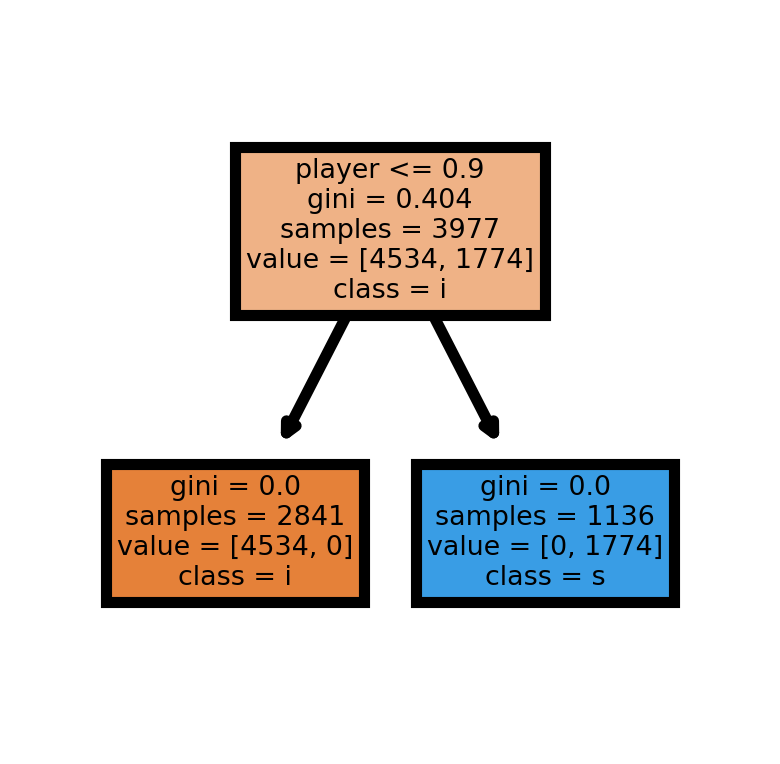

In [79]:
import matplotlib.pyplot as plt
from sklearn import tree
fn=data.columns
cn='is best_batsmen'
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (1,1), dpi=800)
tree.plot_tree(clf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')